## Keertana V. Chidambaram
### DGSE PS 1

##### Exercise 1

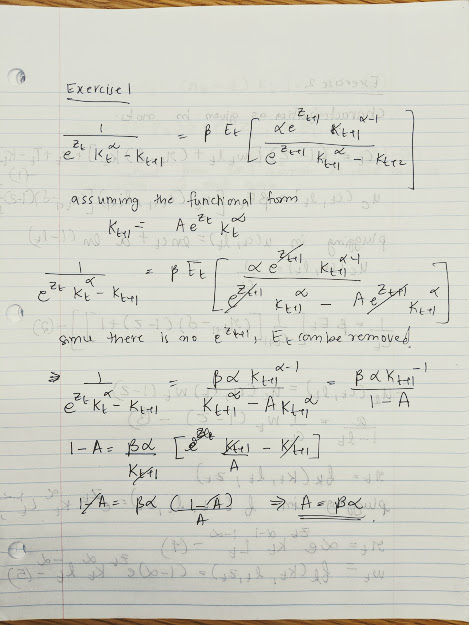

The following characterizing the models are common for exercises 2-7: <br/>
(1) $c_{t}=(1-\tau)\left[w_{t} \ell_{t}+\left(r_{t}-\delta\right) k_{t}\right]+k_{t}+T_{t}-k_{t+1}$ <br/>
(2) $\tau\left[w_{t} \ell_{t}+\left(r_{t}-\delta\right) k_{t}\right]=T_{t}$ <br/>
(3) $z_{t}=\left(1-\rho_{z}\right) \overline{z}+\rho_{z} z_{t-1}+\epsilon_{t}^{z} ; \quad \epsilon_{t}^{z} \sim \text { i.i.d. }\left(0, \sigma_{z}^{2}\right)$ <br/>

The equations that vary with the functional form of the utility function and the production function are: <br/>
(4) $u_{c}\left(c_{t}, \ell_{t}\right)=\beta E_{t}\left\{u_{c}\left(c_{t+1}, \ell_{t+1}\right)\left[\left(r_{t+1}-\delta\right)(1-\tau)+1\right]\right\}$ <br/>
(5) $-u_{\ell}\left(c_{t}, \ell_{t}\right)=u_{c}\left(c_{t}, \ell_{t}\right) w_{t}(1-\tau)$ <br/>
(6) $r_{t}=f_{K}\left(k_{t}, \ell_{t}, z_{t}\right)$ <br/>
(7) $w_{t}=f_{L}\left(k_{t}, \ell_{t}, z_{t}\right)$ <br/>

##### Exercise 2

Equations corresponding to the functional form: 
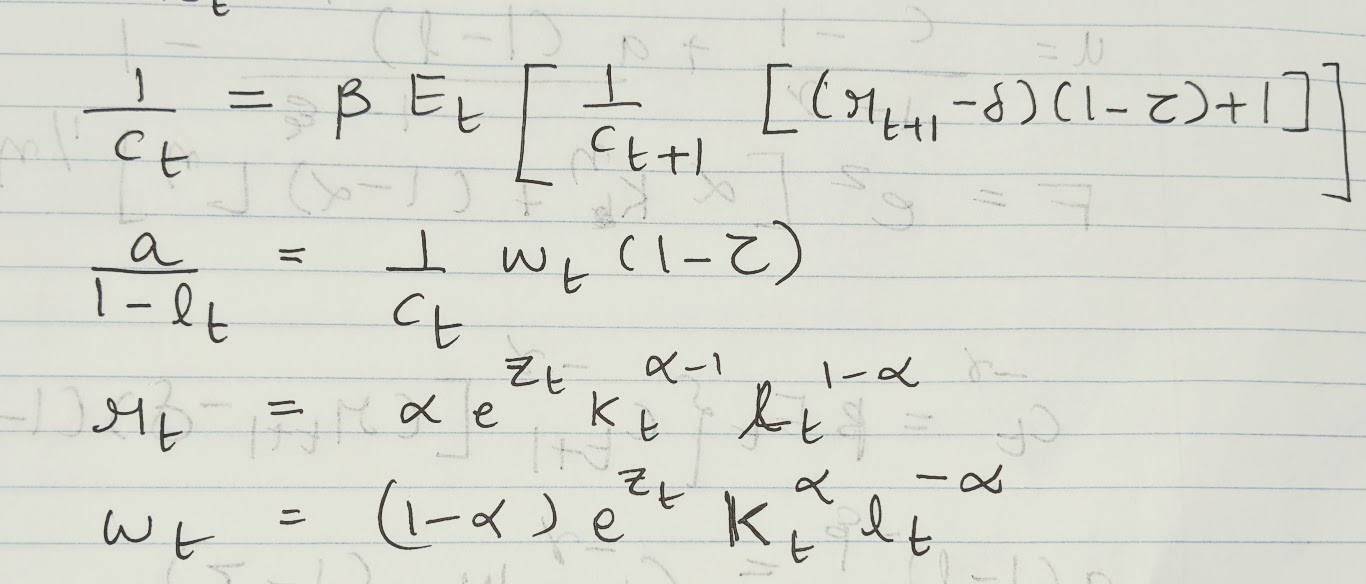

##### Exercise 3

Equations corresponding to the functional form: 
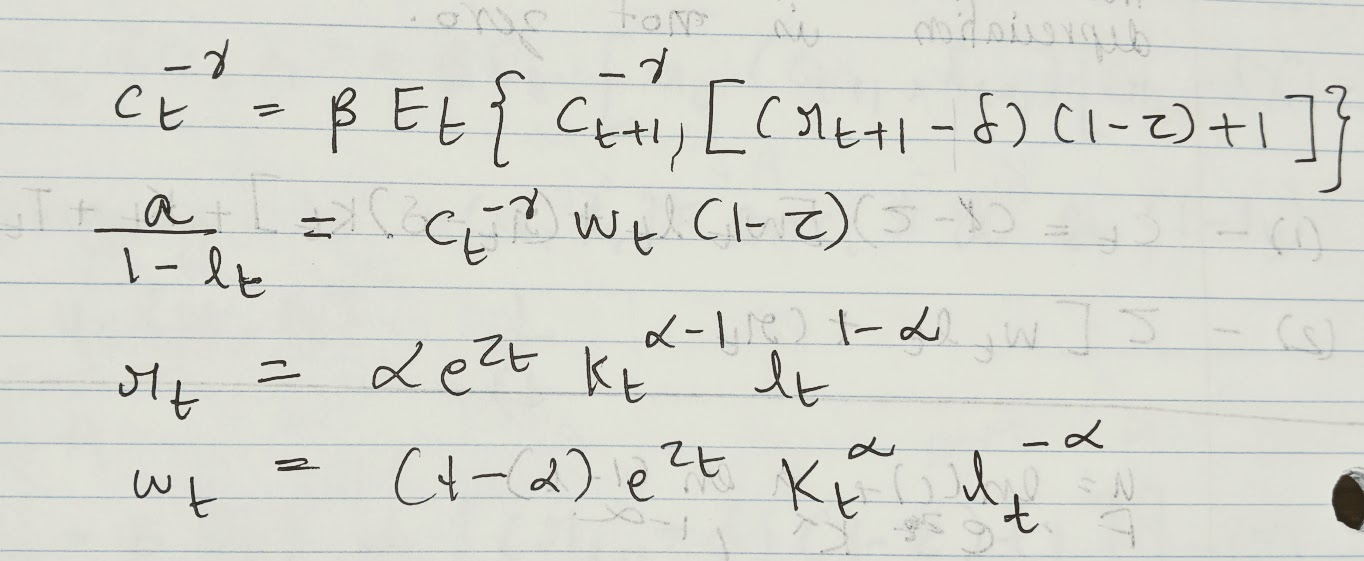

##### Exercise 4

Equations corresponding to the functional form: 
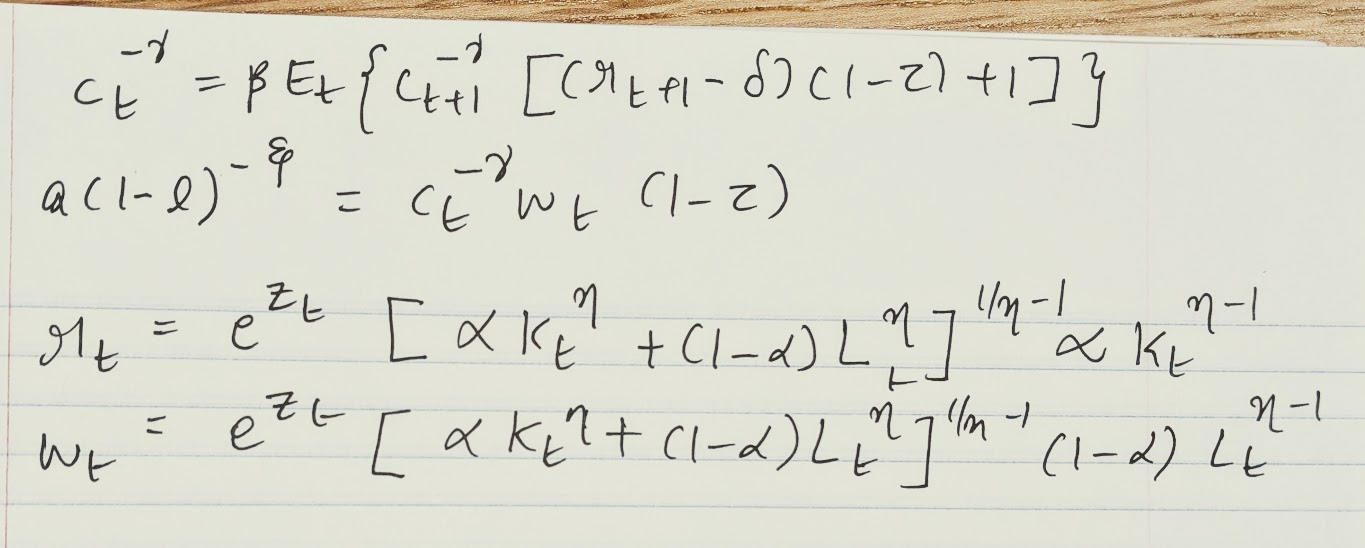

##### Exercise 5

Equations corresponding to the functional form: 
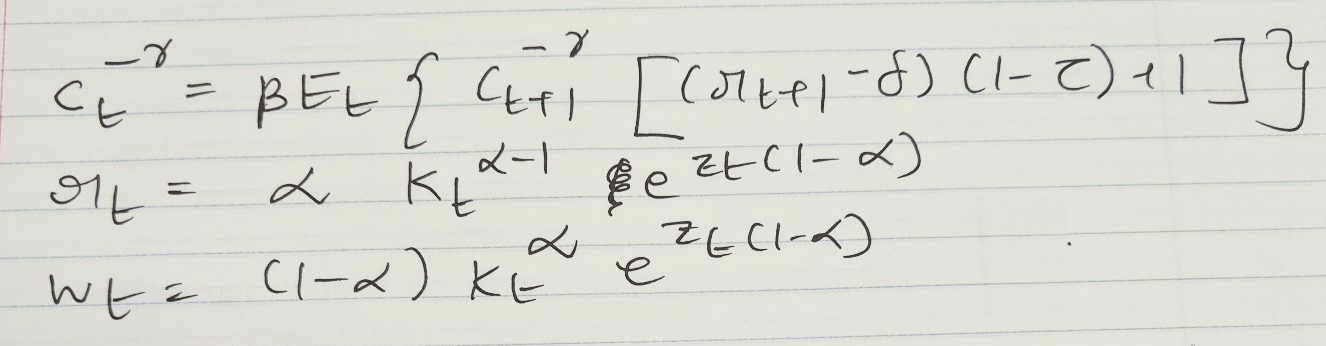

Steady state version is:


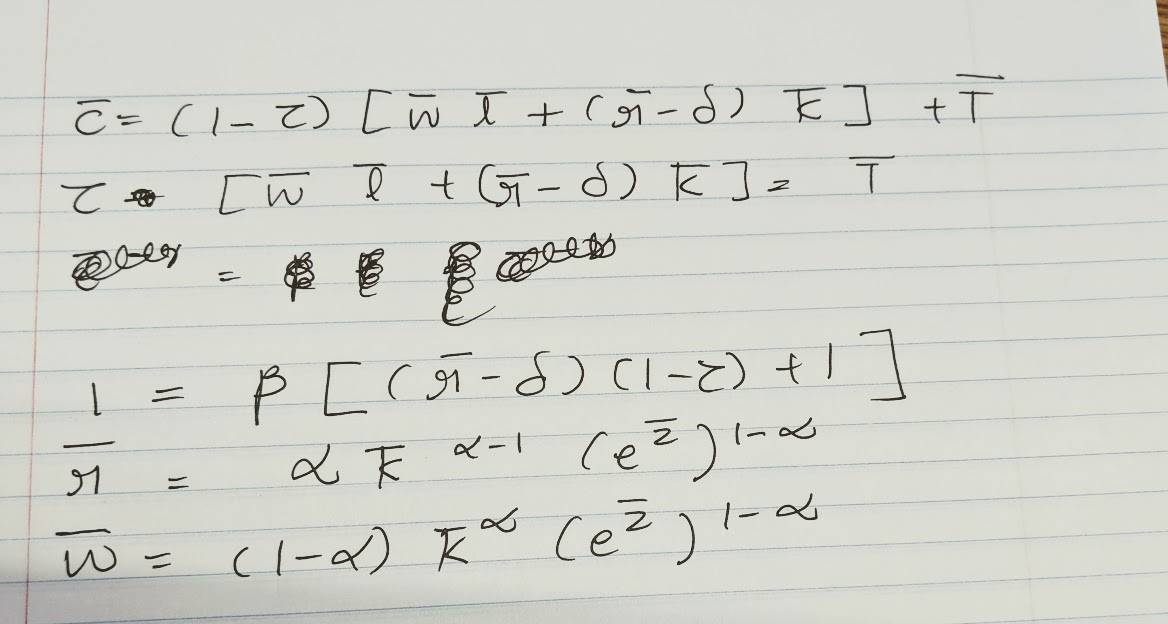

The equation for k is given by: <br/>
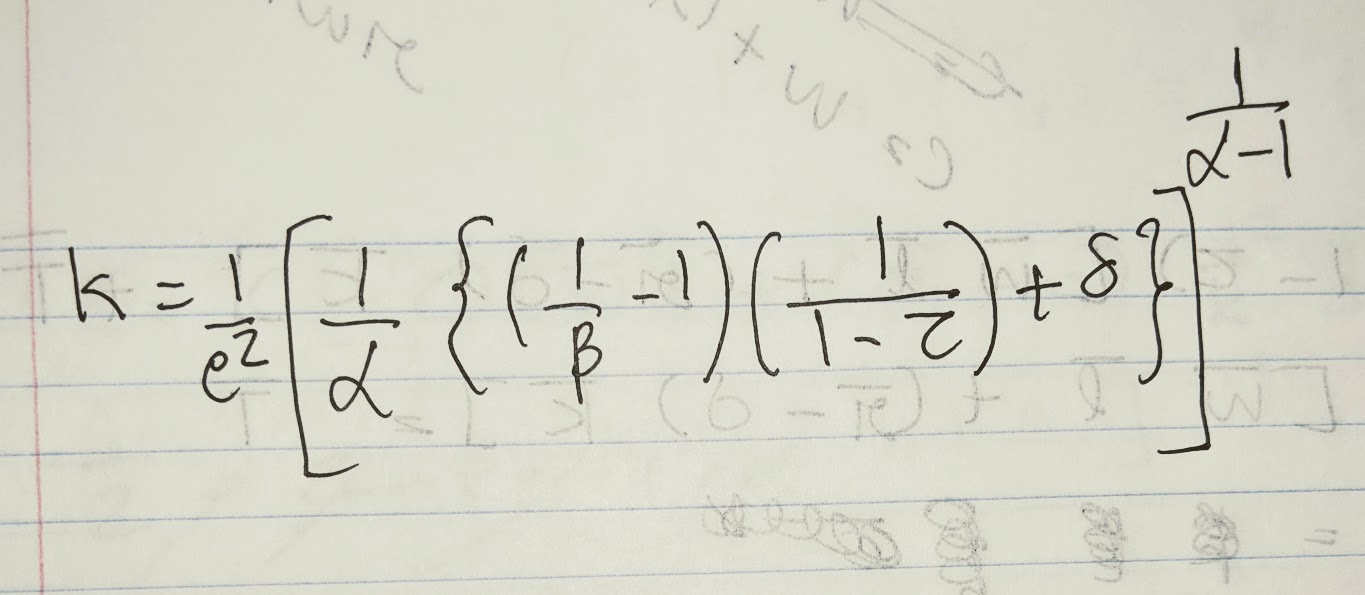

Algebraic solution to the equation: <br/>
$r = 0.1214822771213749$ <br/>
$k = 7.287497950692988$ <br/>
$w = 1.3279527683513057$ <br/>
$c = 1.484504818849544$ <br/>
$T = 0.0742252409424772$ <br/>
$Output = 2.213254613918843$ <br/>
$Investment = 0.7287497950692988$ 

In [33]:
# Numerical solution
import numpy as np
from scipy.optimize import fsolve

# Initializing constants
alpha = 0.40
beta = 0.98
delta = 0.10
gamma = 2.5
tau = 0.05

# Solver function
def solver(init_val):
    k, r, w, c, T = init_val
    eq1 = (w + (r - delta) * k) - c
    eq2 = tau * (w + (r - delta) * k) - T
    eq3 = beta * ((r - delta) * (1 - tau) + 1) - 1
    eq4 = alpha * k ** (alpha-1) - r
    eq5 = (1 - alpha) * (k ** alpha) - w
    return (eq1, eq2, eq3, eq4, eq5)

k, r, w, c, T = fsolve(solver, (1, 1, 1, 1, 1))
i = delta * k
op = k ** alpha
print(k, r, w, c, T, i, op)

7.287497963406798 0.12148227712137491 1.3279527691927506 1.4845048195638528 0.07422524097819265 0.7287497963406798 2.2132546154633452


The numerical solution approximates the analytical solution to a very close degree!

##### Exercise 6

The characterising equations are:
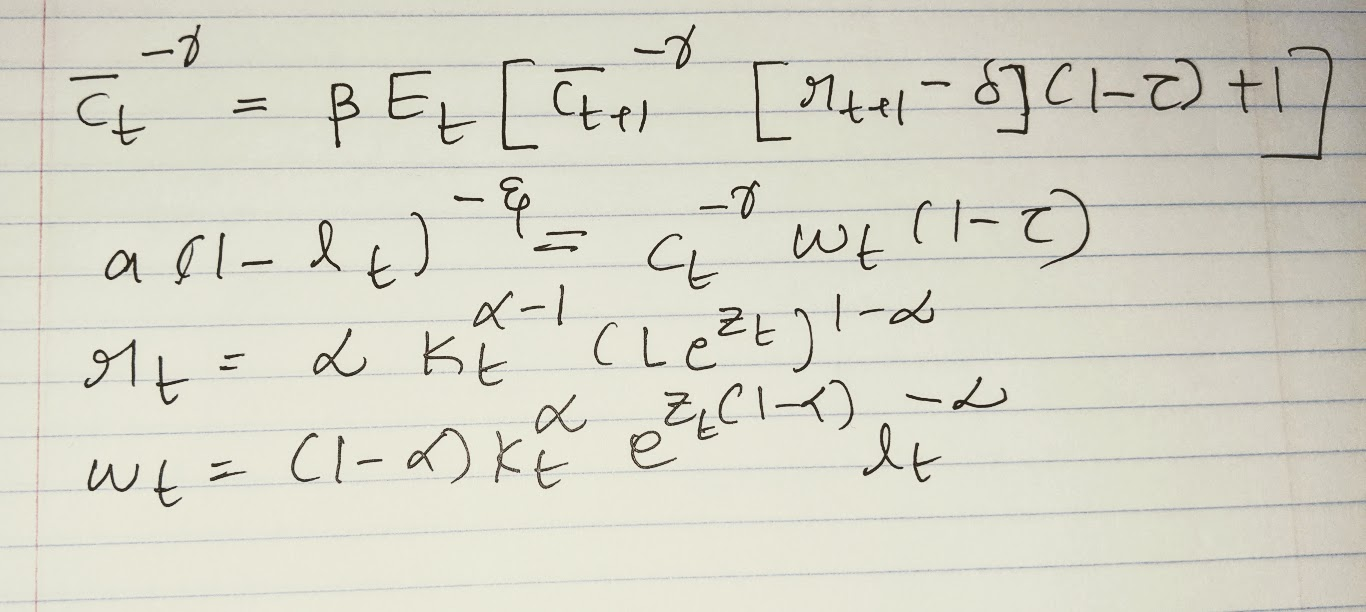

The steady state version of the equations:
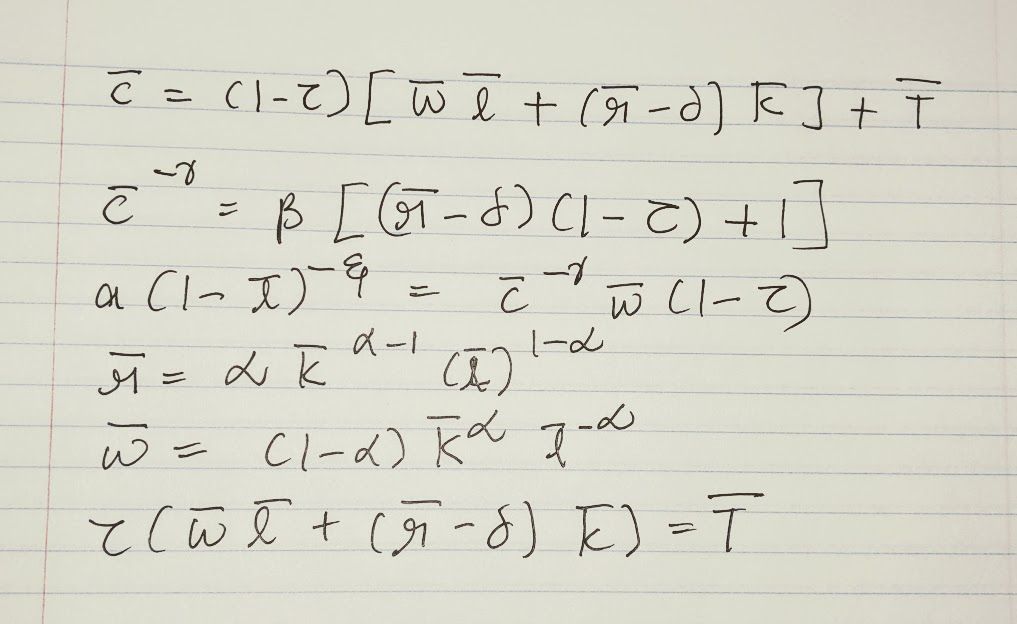

In [34]:
# Numerical solution
import numpy as np
from scipy.optimize import fsolve

# Initializing constants
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.40
a = 0.50
delta = 0.10
tau = 0.05

# Solver function
def solver(init_val):
    k, r, w, l, c, T = init_val
    eq1 = (w  * l + (r - delta) * k) - c
    eq2 = beta * ((r - delta) * (1 - tau) + 1) - 1
    eq3 = (c ** -gamma) * w * (1 - tau) - (a * (1 - l) ** -xi)
    eq4 = alpha * (k ** (alpha - 1)) * (l ** (1 - alpha)) - r
    eq5 = (1 - alpha) * ((k / l) ** alpha) - w
    eq6 = tau * (w * l + (r - delta) * k) - T
    
    return (eq1, eq2, eq3, eq4, eq5, eq6)

k, r, w, l, c, T = fsolve(solver, (0.5, 0.5, 0.5, 0.5, 0.5, 0.5))

i = delta * k
op = (k ** alpha)  * (l ** (1 - alpha))
print(k, r, w, l, c, T, i, op)

4.2252290236515 0.12148227712137485 1.327952767841706 0.5797914532838866 0.8607032061373366 0.04303516030686683 0.42252290236515 1.2832261086072716


##### Exercise 7

In [35]:
# Numerical solution
import numpy as np
from scipy.optimize import fsolve

# Initializing constants
init_vals = (0.5, 0.5, 0.5, 0.5, 0.5, 0.5)
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.40
a = 0.50
delta = 0.10
tau = 0.05
params = [gamma, xi, beta, alpha, a, delta, tau]
params_names = ['gamma', 'xi', 'beta', 'alpha', 'a', 'delta', 'tau']
output_names = ['k', 'r', 'w', 'l', 'c', 'T', 'i', 'op']

# Solver function
def solver(init_val, params):
    k, r, w, l, c, T = init_val
    gamma, xi, beta, alpha, a, delta, tau = params
    eq1 = (w  * l + (r - delta) * k) - c
    eq2 = beta * ((r - delta) * (1 - tau) + 1) - 1
    eq3 = (c ** -gamma) * w * (1 - tau) - (a * (1 - l) ** -xi)
    eq4 = alpha * (k ** (alpha - 1)) * (l ** (1 - alpha)) - r
    eq5 = (1 - alpha) * ((k / l) ** alpha) - w
    eq6 = tau * (w * l + (r - delta) * k) - T
    
    return (eq1, eq2, eq3, eq4, eq5, eq6)

In [37]:
# solving for comparative statics
k, r, w, l, c, T = fsolve(solver, init_vals, args=params)
i = delta * k
op = (k ** alpha)  * (l ** (1 - alpha))
outputs = np.array([k, r, w, l, c, T, i, op])

for i in range(len(params)):
    x = params_names[i]
    new_params = params.copy()
    new_params[i] += 0.001
    
    kn, rn, wn, ln, cn, Tn = fsolve(solver, init_vals, new_params)
    i_n = delta * kn
    opn = (kn ** alpha)  * (ln ** (1 - alpha))
    
    new_outputs = np.array([kn, rn, wn, ln, cn, Tn, i_n, opn])
    del_outputs = new_outputs - outputs
    
    for j in range(len(output_names)):
        y = output_names[j]
        delx = 0.001
        dely = del_outputs[j]
        print('del ', y, '/del ', x, '=', dely/delx)

del  k /del  gamma = 0.13866889868552335
del  r /del  gamma = -5.551115123125783e-14
del  w /del  gamma = 3.2134073180145606e-08
del  l /del  gamma = 0.019028294023115677
del  c /del  gamma = 0.028247603844677727
del  T /del  gamma = 0.0014123801922311108
del  i /del  gamma = 0.013866889868596743
del  op /del  gamma = 0.04211448930324657
del  k /del  xi = -0.8014197673427148
del  r /del  xi = -4.163336342344337e-14
del  w /del  xi = -1.057198772969059e-08
del  l /del  xi = -0.10997185786953967
del  c /del  xi = -0.16325375577153078
del  T /del  xi = -0.008162687788575151
del  i /del  xi = -0.08014197673422707
del  op /del  xi = -0.24339573136522574
del  k /del  beta = 66.24327088406456
del  r /del  beta = -1.094917284473862
del  w /del  beta = 8.039621771614547
del  l /del  beta = 0.27063058777287985
del  c /del  beta = 1.7471136605641258
del  T /del  beta = 0.08735568302820768
del  i /del  beta = 6.624327088406489
del  op /del  beta = 8.371440707646949
del  k /del  alpha = 26.07778609

### DGSE PS 2

Analytical solution:

\begin{aligned} F &=\frac{\alpha \overline{K}^{\alpha-1}}{\overline{K}^{\alpha}-\overline{K}} \\ G &=-\frac{\alpha \overline{K}^{\alpha-1}\left(\alpha+\overline{K}^{\alpha-1}\right)}{\overline{K}^{\alpha}-\overline{K}} \\ H &=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}} \\ L &=-\frac{\alpha \overline{K}^{2 \alpha-1}}{\overline{K}^{\alpha}-\overline{K}} \\ M &=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}} \\\overline{K}=A^{\frac{1}{1-\alpha}}\end{aligned}

\begin{aligned} 
P=\frac{-G \pm \sqrt{G^{2}-4 F H}}{2 F} \\
Q=-\frac{L N+M}{F N+F P+G}
\end{aligned}

In [59]:
alpha = 0
def Ffun(kbar):
    return alpha * (kbar ** (alpha -1 )) / (kbar ** alpha - kbar)

def Gfun(kbar):
    return -1 * alpha * (kbar ** (alpha - 1)) * (alpha + kbar ** (alpha - 1)) / (kbar ** alpha - kbar)

def Hfun(kbar):
    return (alpha ** 2) * (kbar ** (2 * (alpha - 1))) / (kbar ** alpha - kbar)

def Lfun(kbar):
    return -1 * alpha * (kbar ** (2 * alpha - 1)) / (kbar ** alpha - kbar)

def Mfun(kbar):
    return (alpha ** 2) * (kbar ** (2 * (alpha - 1))) / (kbar ** alpha - kbar)

In [60]:
gamma = 2.5
beta = 0.98
alpha = 0.35
delta = 0.10
zbar = 0
tau = 0.05
rho = 0.9
A = alpha * beta
kbar = A ** (1 / (1 - alpha))

In [67]:
F = Ffun(kbar)
G = Gfun(kbar)
H = Hfun(kbar)
L = Lfun(kbar)
M = Mfun(kbar)

P1 = (-G + (G ** 2 - 4 * F * H) ** 0.5) / (2 * F)
P2 = (-G - (G ** 2 - 4 * F * H) ** 0.5) / (2 * F)
Q1 = -(L * rho + M) / (F * rho + F * P1 + G)
Q2 = -(L * rho + M) / (F * rho + F * P2 + G)

<IPython.core.display.Javascript object>


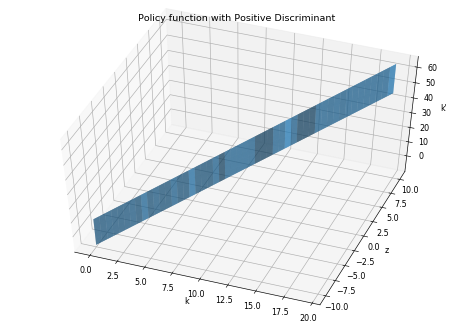

In [87]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

n= 1000
kgrid = np.linspace(0.01 * kbar, 100 * kbar, n)
zgrid = np.linspace(-10, 10, n)
K,Z = np.meshgrid(kgrid, zgrid)
def myfun1(k, z):
    Kprime1 = kbar + P1*(k - kbar) + Q1*(z)
    return Kprime1
def myfun2(k, z):
    Kprime2 = kbar + P2*(k - kbar) + Q2*(z)
    return Kprime2
Kprime1 = myfun1(K, Z)
Kprime2 = myfun2(K, Z)

fig = plt.figure()
ax = Axes3D(fig) 
ax.plot_surface(kgrid, zgrid, Kprime1)
ax.set_xlabel("k")
ax.set_ylabel("z")
ax.set_zlabel("k'")
plt.title("Policy function with P1")
plt.show()

<IPython.core.display.Javascript object>


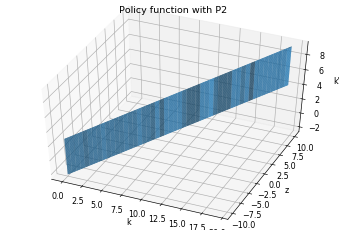

In [88]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.plot_surface(kgrid, zgrid, Kprime2)
ax.set_xlabel("k")
ax.set_ylabel("z")
ax.set_zlabel("k'")
plt.title("Policy function with P2")
plt.show()

##### Exercise 2

Steady state equations after using log linearization:
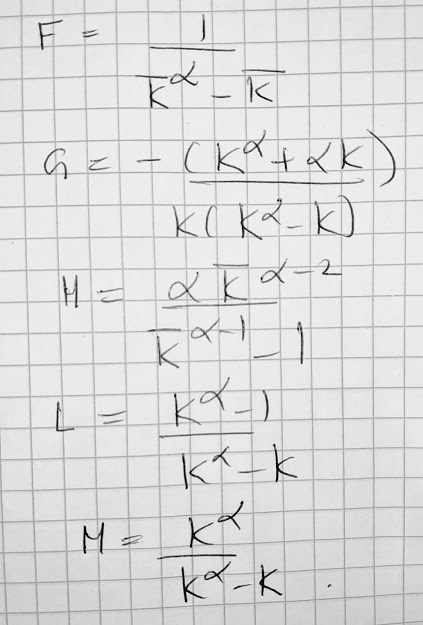

In [ ]:
alpha = 0
def Ffun(kbar):
    return 1 / (kbar ** alpha - kbar)

def Gfun(kbar):
    return -1 * (kbar ** alpha + alpha * kbar) / (k * (kbar ** alpha - kbar))

def Hfun(kbar):
    return alpha * (kbar ** (alpha - 1)) / (kbar ** alpha - kbar)

def Lfun(kbar):
    return (kbar ** alpha - 1) / (kbar ** alpha - kbar)

def Mfun(kbar):
    return (kbar ** alpha) / (kbar ** alpha - kbar)

In [89]:
gamma = 2.5
beta = 0.98
alpha = 0.35
delta = 0.10
zbar = 0
tau = 0.05
rho = 0.9
A = alpha * beta
kbar = A ** (1 / (1 - alpha))

In [90]:
F = Ffun(kbar)
G = Gfun(kbar)
H = Hfun(kbar)
L = Lfun(kbar)
M = Mfun(kbar)

P1 = (-G + (G ** 2 - 4 * F * H) ** 0.5) / (2 * F)
P2 = (-G - (G ** 2 - 4 * F * H) ** 0.5) / (2 * F)
Q1 = -(L * rho + M) / (F * rho + F * P1 + G)
Q2 = -(L * rho + M) / (F * rho + F * P2 + G)

<IPython.core.display.Javascript object>


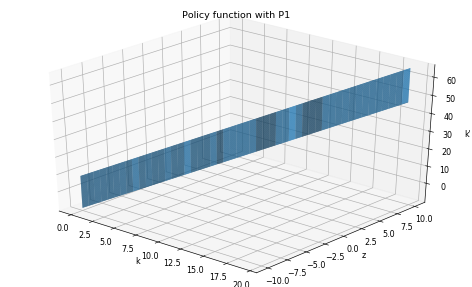

In [91]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

n= 1000
kgrid = np.linspace(0.01 * kbar, 100 * kbar, n)
zgrid = np.linspace(-10, 10, n)
K,Z = np.meshgrid(kgrid, zgrid)
def myfun1(k, z):
    Kprime1 = kbar + P1*(k - kbar) + Q1*(z)
    return Kprime1
def myfun2(k, z):
    Kprime2 = kbar + P2*(k - kbar) + Q2*(z)
    return Kprime2
Kprime1 = myfun1(K, Z)
Kprime2 = myfun2(K, Z)

fig = plt.figure()
ax = Axes3D(fig) 
ax.plot_surface(kgrid, zgrid, Kprime1)
ax.set_xlabel("k")
ax.set_ylabel("z")
ax.set_zlabel("k'")
plt.title("Policy function with P1")
plt.show()

<IPython.core.display.Javascript object>


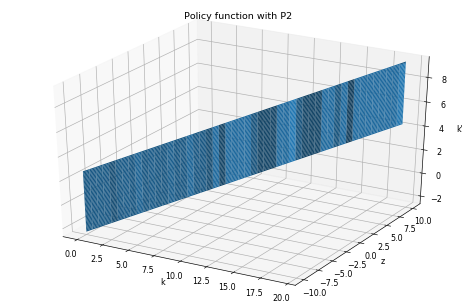

In [92]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.plot_surface(kgrid, zgrid, Kprime2)
ax.set_xlabel("k")
ax.set_ylabel("z")
ax.set_zlabel("k'")
plt.title("Policy function with P2")
plt.show()

##### Exercise 3
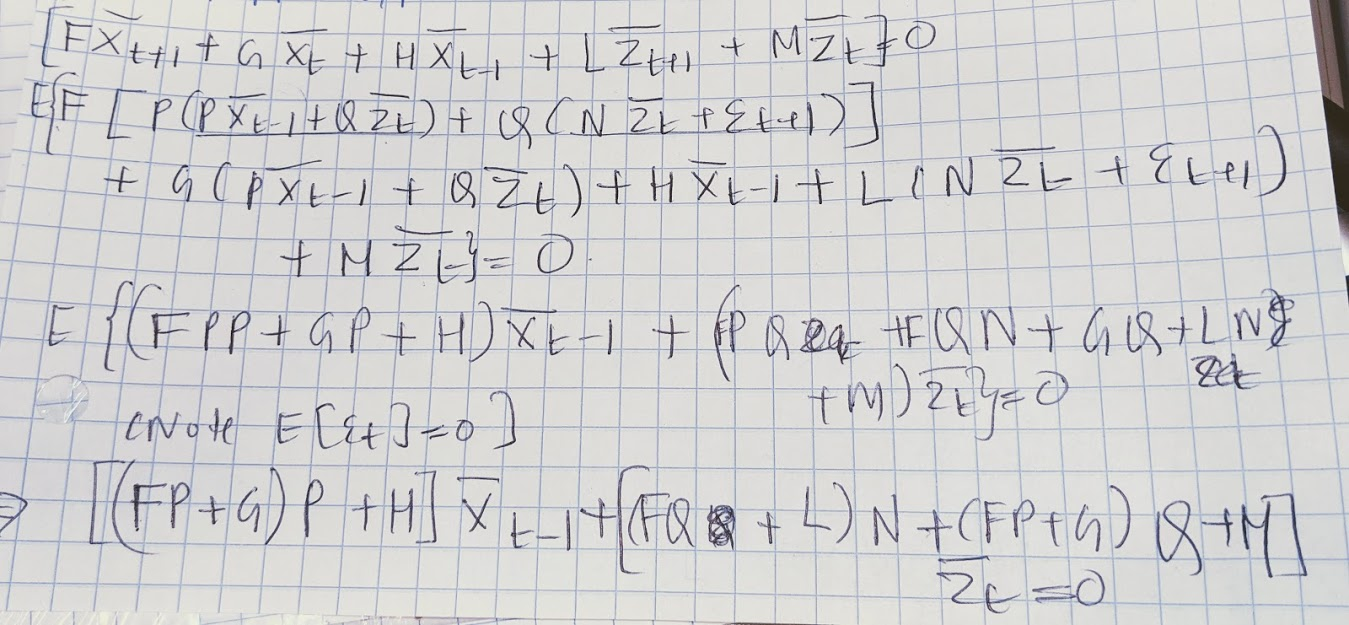

##### Exercise 4

In [95]:
# LinApp toolkit can be downloaded at https://github.com/kerkphil/DSGE-Utilities

import numpy as np
import matplotlib.pyplot as plt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL


gamma  = 2.5
xi = 1.5
beta = 0.98
alpha = 0.40
a = 0.5
delta = 0.10
tau = 0.05
z_bar = 0

def Modeldefs(kp, k, l, z, params):
    (alpha, beta, gamma, delta, tau, xi, a) = params
    Y = k**alpha * (np.exp(z)*l)**(1-alpha)
    w = (1-alpha)* Y/l
    r = alpha*Y/k
    T = tau*(w*l + (r-delta)*k)
    c = (w*l + (r - delta)*k) + k - kp
    i = delta * k
    u = (c**(1-gamma)-1)/(1-gamma) + a*(((1-l)**(1-xi))-1)/(1-xi)
    return Y, w, r, T, c, i, u

def Modeldyn(theta0, params):
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    l = Y
    Y, w, r, T, c, i, u = Modeldefs(Xp, X, Y, Z, params)
    Yp, wp, rp, Tp, cp, ip, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    (alpha, beta, gamma, delta, tau, xi, a) = params
    E1 = c**(-gamma) - beta* cp**(-gamma) * ((1 - tau)*(rp - delta) + 1)
    E2 = a * (1-l)**(-xi) - w * (1 - tau) * c**(-gamma)
    return np.array([E1, E2])


params = np.array([alpha, beta, gamma, delta, tau, xi, a])
Zbar = np.array([0.])
nx = 1
ny = 1
nz = 1
logX = 1
Sylv = 0
guessXY = np.array([.1, .25])
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, lbar) = XYbar
theta0 = np.array([kbar, kbar, kbar, lbar, lbar, 0., 0.])
check = Modeldyn(theta0, params)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')
    
Ybar, wbar, rbar, Tbar, cbar, ibar, ubar = \
    Modeldefs(kbar, kbar, lbar, 0., params)

print("Steady state value of the variables")
print ('kbar:   ', kbar)
print ('lbar:   ', lbar)
print ('Ybar:   ', Ybar)
print ('wbar:   ', wbar)
print ('rbar:   ', rbar)
print ('cbar:   ', cbar)
print ('ibar:   ', ibar)
print ('ubar:   ', ubar)

Steady state value of the variables
kbar:    4.225229026783573
lbar:    0.5797914531670038
Ybar:    1.2832261088325483
wbar:    1.327952768351271
rbar:    0.12148227712137966
cbar:    0.8607032061541906
ibar:    0.42252290267835735
ubar:    -0.7108726381177776


##### Exercise 5

In [96]:
# solving for comparative statics

Y, w, r, T, c, i, u = Modeldefs(kbar, kbar, lbar, 0., params)
outputs = np.array([Y, w, r, T, c, i, u])
params = np.array([alpha, beta, gamma, delta, tau, xi, a])
params_names = ['alpha', 'beta', 'gamma', 'delta', 'tau', 'xi', 'a']
output_names = ['Y', 'w', 'r', 'T', 'c', 'i', 'u']

for i in range(len(params)):
    x = params_names[i]
    new_params = params.copy()
    new_params[i] += 0.001
    
    Yn, wn, rn, Tn, cn, i_n, un = Modeldefs(kbar, kbar, lbar, 0., new_params)
    new_outputs = np.array([Yn, wn, rn, Tn, cn, i_n, un])
    del_outputs = new_outputs - outputs
    
    for j in range(len(output_names)):
        y = output_names[j]
        delx = 0.001
        dely = del_outputs[j]
        print('del ', y, '/del ', x, '=', dely/delx)

del  Y /del  alpha = 2.551225448023553
del  w /del  alpha = 0.4224931795657749
del  r /del  alpha = 0.545832545140304
del  T /del  alpha = 0.12756127240117626
del  c /del  alpha = 2.551225448024219
del  i /del  alpha = 0.0
del  u /del  alpha = 3.6983562236674317
del  Y /del  beta = 0.0
del  w /del  beta = 0.0
del  r /del  beta = 0.0
del  T /del  beta = 0.0
del  c /del  beta = 0.0
del  i /del  beta = 0.0
del  u /del  beta = 0.0
del  Y /del  gamma = 0.0
del  w /del  gamma = 0.0
del  r /del  gamma = 0.0
del  T /del  gamma = 0.0
del  c /del  gamma = 0.0
del  i /del  gamma = 0.0
del  u /del  gamma = -0.013090549961458642
del  Y /del  delta = 0.0
del  w /del  delta = 0.0
del  r /del  delta = 0.0
del  T /del  delta = -0.21126145133917862
del  c /del  delta = -4.225229026783239
del  i /del  delta = 4.225229026783572
del  u /del  delta = -6.185698900739611
del  Y /del  tau = 0.0
del  w /del  tau = 0.0
del  r /del  tau = 0.0
del  T /del  tau = 0.8607032061541953
del  c /del  tau = 0.0
del  i /de

##### Exercise 6

In [103]:
[A, B, C, D, F, G, H, J, K, L, M] = LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)
P, Q, R, S = LinApp_Solve(A, B, C, D, F, G, H, J, K, L, M, rho, Zbar, Sylv)
# Note NN = rho
print (F, G, H, L, M, rho, P, Q)

[[0.]] [[-22.52731982]] [[22.27702702]] [[0.]] [[3.00365877]] 0.9 [[0.35542591]] [[0.07659587]]
